Tài liệu này mang giấy phép Creative Commons Attribution (CC BY).
(c) Nguyễn Ngọc Sáng, Zhukovsky 12/2018.

[@SangVn](https://github.com/SangVn) [@VnCFD](https://vncfdgroup.wordpress.com/)

*Thực hành CFD với Python!*

# Bài 3. Phương trình truyền nhiệt một chiều (phương trình khuyếch tán)


Phương trình truyền nhiệt một chiều có dạng:
$$\frac {\partial u} {\partial t} = \alpha \frac {\partial^2 u} {\partial x^2}$$
Đây là phương trình đạo hàm riêng cấp hai thuộc loại parabol. Nó mô tả quá trình truyền nhiệt hay quá trình khuyếch tán trong môi trường đẳng hướng. 

**Sơ đồ sai phân hữu hạn tường minh**

Sử dụng xấp xỉ sai phân ở bài một cho đạo hàm riêng bậc một và bậc hai ta có sơ đồ sai phân tường minh:
$$\frac {u_i^{n+1} - u_i^n} {\Delta t} = \alpha \frac {u_{i+1}^n - 2u_i^n + u_{i-1}^n} {\Delta x^2}$$

Sơ đồ này có độ chính xác bậc một với sai số xấp xỉ $ O(\Delta t, (\Delta x)^2)$. Sơ đồ ổn định khi $0 \leq r \leq 1/2, r = \alpha \Delta t / (\Delta x)^2$. `Phương trình sửa đổi` trong trường hợp này có dạng:
$$u_t - \alpha u_{xx} = [-\frac{1}{2}\alpha^2 \Delta t + \frac {1}{12}\alpha (\Delta x)^2]u_{xxxx} + [\frac {1}{3} \alpha^3(\Delta t)^2 - \frac {1}{12} \alpha ^2 \Delta t(\Delta x)^2+\frac{1}{360}\alpha(\Delta x)^4] u_{xxxxxx} + ... $$
Ta thấy, với $r=1/6$ sai số xấp xỉ bằng $O((\Delta t)^2, (\Delta x)^4)$. Ngoài ra, trong biểu thức sai số xấp xỉ không có đạo hàm bậc lẻ, tức là không có tính chất `phân tán` ở đây. 

**Bài toán 1:**

Điều kiện ban đầu: $u(x, 0) = 1 \ với 1.5 \leq x \leq 2.5, u(x, 0) = 0 \ với\ x\ khác\ thuộc\ [0, 4]$ 

Từ sơ đồ ta có: $$u_i^{n+1} = u_i^n + \frac {\alpha \Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

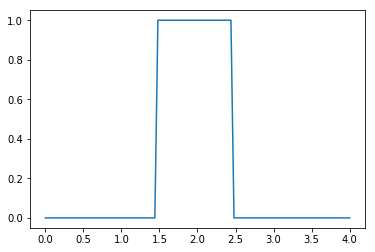

In [5]:
#Bài 3: Phương trình truyền nhiệt 
import numpy as np #gọi thư viện numpy
import matplotlib.pyplot as plt #gọi thư viện pyplot

#chỉ cần khi bạn sử dụng ipython notebook
%matplotlib inline 

#chia lưới 
nx = 101        # Số điểm lưới trên đoạn [0, 4]
dx = 4./(nx-1) # Độ dài ô lưới
x = np.linspace(0, 4, nx) #Ta dùng hàm linspace trong numpy dể chia lưới

#các thông số khác 
c = 1.         # c - alpha
r = 1./6       # r=c*dt/(dx)^2
dt = r*dx**2/c

#Điều khiện ban đầu: 
#u(x, 0) = 1 trên đoạn [1.5, 2.5], = 0 trên phần còn lại
u0 = np.zeros(nx) # mảng nx phần tử thứ tự từ 0 tới nx-1

#Điều kiện trên đoạn [1.5, 2.5]
u0[int(1.5/dx) : int(2.5/dx)] = 1

#Vẽ đồ thị hàm u tại thời điểm ban đầu
plt.plot(x, u0)
plt.show()

In [2]:
#Hàm tìm nghiệm u tại thời gian t=nt*dt
def solver(nt):
    u = u0.copy() #Gán lại giá trị u ban đầu
    for n in range(nt): #thực hiện nt bước
        un = u.copy()   #mảng tạm thời lưu giá trị u ở lớp thời gian n
        
        #for i in range (1, nx-1): u[i] = un[i] + c*dt/dx**2*(un[i+1] - 2*un[i] + un[i-1])
        u[1:-1] = un[1:-1] + c*dt/dx**2*(un[2:] - 2*un[1:-1] + un[0:-2]) #tính u ở lớp n+1
        
    return u #trả về giá trị u

#tìm nghiệm u tại các thời điểm khác nhau
u_50 = solver(50) # nt = 50
u_100 = solver(100) # nt = 100
u_200 = solver(200) # nt = 200

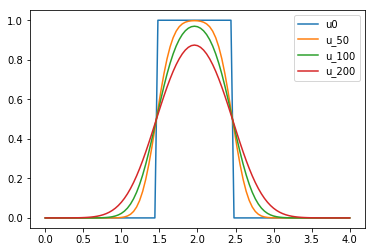

In [3]:
plt.plot(x, u0, label='u0')
plt.plot(x, u_50, label='u_50')
plt.plot(x, u_100, label='u_100')
plt.plot(x, u_200, label='u_200')
plt.legend()
plt.show()

Đồ thị này cho ta thấy, nếu tại thời điểm ban đầu nhiệt độ ở giữa đoạn là 1 độ, thì sau thời gian t, nhiệt lượng được truyền tới các điểm xung quanh. Nhiệt độ xung quanh tăng lên trong khi nhiệt độ ở giữa giảm xuống.

Điều kiện biên tuần hoàn:
======
Ở ví dụ trong bài 2 và ví dụ trên chúng ta không đả động tới điều kiện biên. Bởi vì 'dao động' chưa lan truyền tới biên nên ta mặc định tại biên u = 0 không đổi. Bây giờ ta sẽ xét bài toán thứ 2 với điều kiện biên tuần hoàn.

**Bài toán 2:**

Điều kiện ban đầu: $u(x, 0) = sin(2\pi x), 0\leq x \leq 1, \alpha = 0.5$. Điều kiện biên tuần hoàn (giá trị tại biên trái, phải bằng nhau).

Nghiệm chính xác tại $t = 1$ là $u(x, 1) = exp(-\alpha 4 \pi^2)sin(2\pi x)$

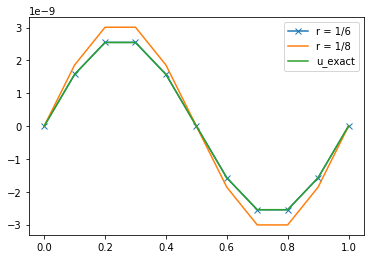

In [4]:
#Thông số tính toán
nx = 11        # Số điểm lưới trên đoạn [0, 1]
dx = 1./(nx-1) # Độ dài ô lưới
c = 0.5        # c - alpha

#chia lưới 
x = np.linspace(0, 1, nx)
#Điều khiện ban đầu: 
u0 = np.zeros(nx) # mảng nx phần tử thứ tự từ 0 tới nx-1
u0 = np.sin(2*np.pi*x)
#tương ứng với: 
#for i in range(nx):
    #u0[i] = np.sin(2*np.pi*x[i])
    
#Hàm tìm nghiệm u tại thời gian t=nt*dt
def solver_2(t, r):
    dt = r*dx**2/c
    nt = int(t/dt)
    u = u0.copy() #Gán lại giá trị u ban đầu
    un = np.zeros(nx) #mảng chứa giá trị tạm thời
    
    for n in range(nt): #thực hiện nt bước
        un = u.copy()   #mảng tạm thời lưu giá trị u ở lớp thời gian n
        
        u[1:-1] = un[1:-1] + c*dt/dx**2*(un[2:] - 2*un[1:-1] + un[0:-2]) #tính u ở lớp n+1
        
        u[0] = un[0] + c*dt/dx**2*(un[1] - 2*un[0] + un[-2]) #điều kiện biên trái
        u[-1] = u[0] # điều kiện biên phải
        if(n == nt-2): dt = t-(nt-1)*dt #hiệu chỉnh dt ở bước cuối để đảm bảo đúng thời gian t
            
    return u #trả về giá trị u

#tìm nghiệm u khi t = 1.0 với r1 = 1/6 và r2 = 1/8
u_r1 = solver_2(1., 1./6)
u_r2 = solver_2(1., 1./8)

#nghiệm chính xác
u_cx = np.zeros(nx)
u_cx = np.exp(-c*4*np.pi**2)*np.sin(2*np.pi*x)

'''
câu lệnh trên tương đương với:
for i in range(nx):
    u_cx[i] = np.exp(-c*4*np.pi**2)*np.sin(2*np.pi*x[i])
'''    

#plt.plot(x, u0, label='u0')
plt.plot(x, u_r1, marker='x', label='r = 1/6')
plt.plot(x, u_r2, label='r = 1/8')
plt.plot(x, u_cx, label='u_exact')
plt.legend()
plt.show()

Ta thấy rõ ràng với r=1/6 bước thời gian lớn hơn khi r=1/8, thế nhưng kết quả thứ nhất lại chính xác hơn, đúng như những gì ta nói ở trên. Do đó việc lựa chọn bước thời gian tính toán rất quan trọng.

Bài 3 kết thúc tại đây. Ở bài 4 chúng sẽ chuyển sang xem xét bài toán 2 chiều.

## [Bài 4. Phương trình Laplace hai chiều](./Bai_4.ipynb)